In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import nltk
from nltk.corpus import stopwords
import seaborn as sns
from langdetect import detect

# Training Set

In [3]:
df = pd.read_csv("clean_mapping_train.csv")
df_wiwi = pd.read_csv("results_by_image_cat.csv")
df_val = pd.read_csv("clean_mapping_validation.csv")
df_test = pd.read_csv("clean_mapping_test.csv")

In [4]:
import re

def word_normalizer(word): 
    word = re.sub('[^A-Za-z0-9]+', '', word)
    return word.lower()

def remove_stopwords(s):
    stop_words = set(stopwords.words("english"))
    stop_words.update(set(stopwords.words("spanish")))
    stop_words.update(set(stopwords.words("french")))
    words = s.split()
    filtered = [word_normalizer(word) for word in words if word.lower() not in stop_words]
    filtered = ' '.join(filtered)
    return filtered

def save_stopwords(s):
    stop_words = set(stopwords.words("english"))
    stop_words.update(set(stopwords.words("spanish")))
    stop_words.update(set(stopwords.words("french")))
    words = s.split()
    filtered = [word for word in words if word.lower() in stop_words]
    return filtered

def save_words(s):
    stop_words = set(stopwords.words("english"))
    stop_words.update(set(stopwords.words("spanish")))
    stop_words.update(set(stopwords.words("french")))
    words = s.split()
    #filtered = [word_normalizer(word).replace("(","").replace(")","") for word in words if word.lower() not in stop_words]
    filtered = [word.replace("(","").replace(")","") for word in words if word.lower() not in stop_words]
    return filtered    

def word_count_capital(x):
    x = remove_stopwords(x)
    x = x.split()
    return len(x)

def word_count(x):
    x = x.split()
    return len(x)



In [7]:
df_wiwi

,image_name,title,predicted_caption,bleu1,bleu2,rougeL,meteor,Predicted_Category
0,perfect-pan-roasted-chicken-thighs-365489.jpg,Perfect Pan-Roasted Chicken Thighs,<unk> <unk> <unk> <unk>,0.00000,0.0,0.000000,0.000000,Meat & Poultry
1,mushroom-and-fontina-quiche-355191.jpg,Mushroom and Fontina Quiche,Crispy Kale and Potato Frittata,20.00000,0.0,22.222222,12.195122,Appetizers & Small Plates
2,grill-roasted-pineapple.jpg,Grill-Roasted Pineapple,<unk> <unk> <unk> <unk> <unk> <unk>,0.00000,0.0,0.000000,0.000000,Appetizers & Small Plates
3,shellfish-boil-with-spicy-green-dipping-sauce-...,Shellfish Boil with Spicy Green Dipping Sauce,Roasted Red Pepper and Tomato Salad,0.00000,0.0,0.000000,0.000000,Seafood Specialties
4,simple-strawberry-dulce-de-leche-shortbread-ta...,Simple Strawberry Dulce de Leche Shortbread Tart,Peach and Blueberry Pie,0.00000,0.0,0.000000,0.000000,Desserts & Sweet Treats
...,...,...,...,...,...,...,...,...
1342,roasted-beets-with-crispy-sunchokes-and-pickle...,Roasted Beets With Crispy Sunchokes and Pickle...,Pasta <unk> Roasted Tomato Sauce,10.73539,0.0,12.500000,5.681818,Appetizers & Small Plates
1343,jalapeno-poppers-243195.jpg,Jalapeño Poppers,Crispy Fried Chicken,0.00000,0.0,0.000000,0.000000,Appetizers & Small Plates
1344,baked-pears-with-ice-cream-350160.jpg,Baked Pears with Ice cream,<unk> <unk>,0.00000,0.0,0.000000,0.000000,Desserts & Sweet Treats
1345,salted-black-licorice-caramels.jpg,Salted Black Licorice Caramels,Chocolate-Covered Strawberries,0.00000,0.0,0.000000,0.000000,Desserts & Sweet Treats


In [ ]:
df["NumWords"] = df.Title.apply(word_count)
df["NumWords_no_stopwords"] = df.Title.apply(word_count_capital)
df["stopwords"] = df.Title.apply(save_stopwords)
df["Words"] = df.Title.apply(save_words)

df_val["NumWords"] = df_val.Title.apply(word_count)
df_val["NumWords_no_stopwords"] = df_val.Title.apply(word_count_capital)
df_val["stopwords"] = df_val.Title.apply(save_stopwords)
df_val["Words"] = df_val.Title.apply(save_words)

df_test["NumWords"] = df_test.Title.apply(word_count)
df_test["NumWords_no_stopwords"] = df_test.Title.apply(word_count_capital)
df_test["stopwords"] = df_test.Title.apply(save_stopwords)
df_test["Words"] = df_test.Title.apply(save_words)

In [ ]:
count_stopwords={}
for lista in df["stopwords"]:
    for stopword in lista:
        if stopword in count_stopwords:
            count_stopwords[stopword]+=1
        else:
            count_stopwords[stopword]=1

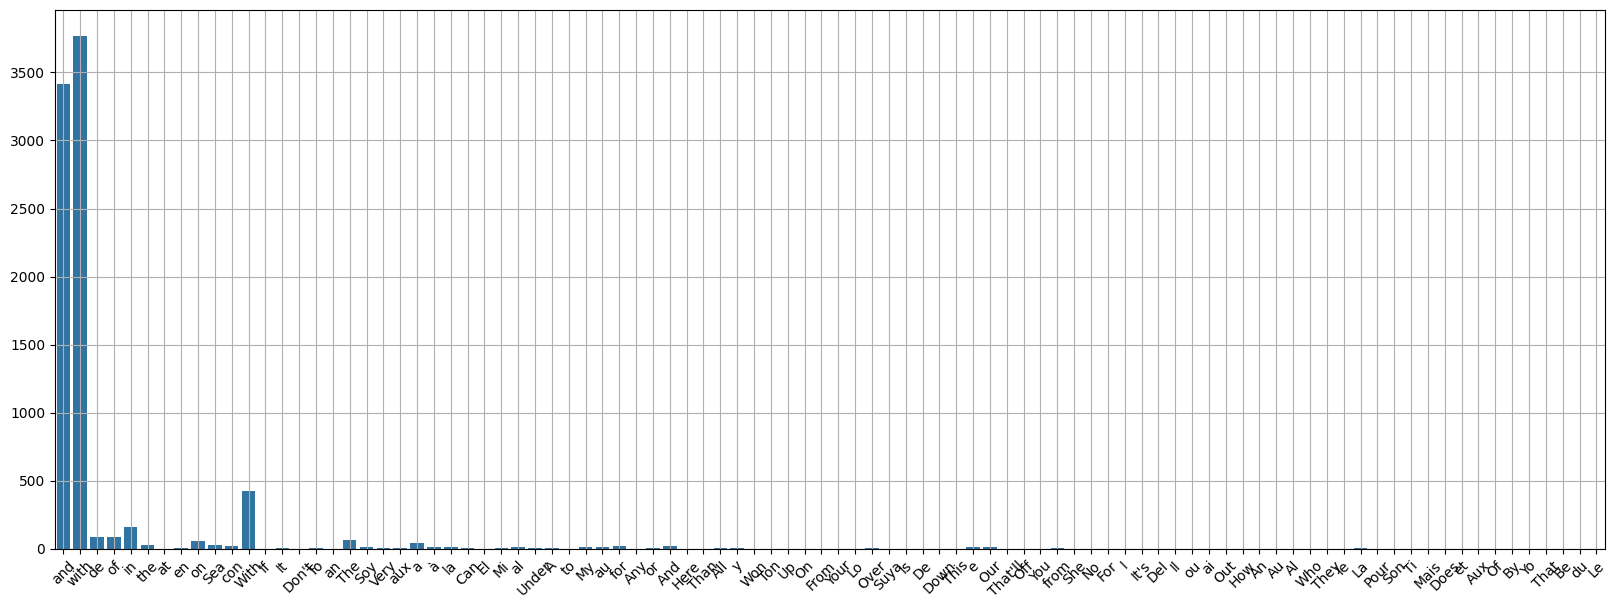

In [22]:
fig, ax = plt.subplots(figsize=(20,7))
sns.barplot(count_stopwords, ax=ax)
ax.tick_params(axis="x",rotation=45)
ax.grid()

In [23]:
count_words={}
for lista in df["Words"]:
    for word in lista:
        if word in count_words:
            count_words[word]+=1
        else:
            count_words[word]=1

In [24]:
word_freq = pd.DataFrame.from_dict(count_words,orient="index").sort_values(0, ascending=False)
word_freq.to_excel("Caption_Word_Freq.xlsx")

In [26]:
word_freq

,0
Salad,784
Chicken,666
Sauce,538
Grilled,444
Cake,360
...,...
Seviche,1
Maraschino,1
Unfried,1
No-Lettuce,1


In [27]:
aux_count_wrds = df["NumWords"].value_counts().reset_index().sort_values("NumWords")
aux_count_wrds

,NumWords,count
8,1,163
1,2,1670
0,3,2165
3,4,1428
2,5,1455
4,6,1393
5,7,1170
6,8,680
7,9,363
9,10,147


In [28]:
df["NumWords"].value_counts().reset_index().sort_values("NumWords")["count"].describe().reset_index()

,index,count
0,count,16.000000
1,mean,673.250000
2,std,745.679511
3,min,1.000000
4,25%,27.250000
5,50%,263.000000
6,75%,1401.750000
7,max,2165.000000


In [29]:
aux_count_wrds_no_stop = df["NumWords_no_stopwords"].value_counts().reset_index().sort_values("NumWords_no_stopwords")
aux_count_wrds_no_stop

,NumWords_no_stopwords,count
6,1,181
3,2,1810
0,3,2711
1,4,2428
2,5,1886
4,6,1071
5,7,420
7,8,167
8,9,73
9,10,14


In [30]:
df["NumWords_no_stopwords"].value_counts().reset_index().sort_values("NumWords_no_stopwords")["count"].describe().reset_index()

,index,count
0,count,13.000000
1,mean,828.615385
2,std,1022.319873
3,min,1.000000
4,25%,14.000000
5,50%,181.000000
6,75%,1810.000000
7,max,2711.000000


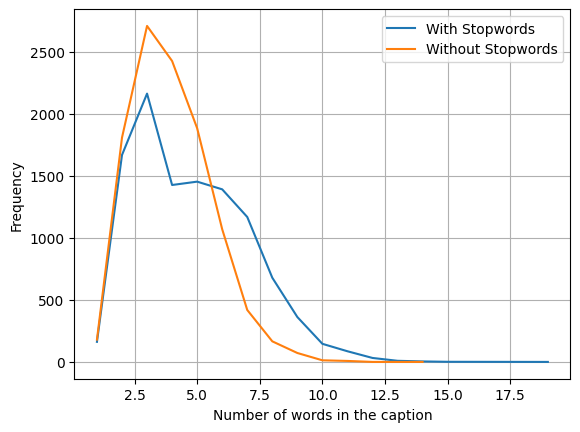

In [34]:
fig, ax = plt.subplots()
ax.plot(aux_count_wrds.NumWords, aux_count_wrds["count"], label="With Stopwords")
ax.plot(aux_count_wrds_no_stop.NumWords_no_stopwords, aux_count_wrds_no_stop["count"], label="Without Stopwords")
ax.set(xlabel="Number of words in the caption", ylabel="Frequency")
ax.legend()
ax.grid()

In [32]:
aux = df[["NumWords", "NumWords_no_stopwords"]].groupby("NumWords").mean().reset_index()
aux["pctg_red"] = (100*(aux.NumWords - aux.NumWords_no_stopwords)/aux.NumWords)

In [ ]:
aux

,NumWords,NumWords_no_stopwords,pctg_red
0,1,1.000000,0.000000
1,2,1.990419,0.479042
2,3,2.934411,2.186297
3,4,3.554622,11.134454
4,5,4.085223,18.295533
5,6,4.715004,21.416607
6,7,5.360684,23.418803
7,8,6.069118,24.136029
8,9,6.909091,23.232323
9,10,7.693878,23.061224


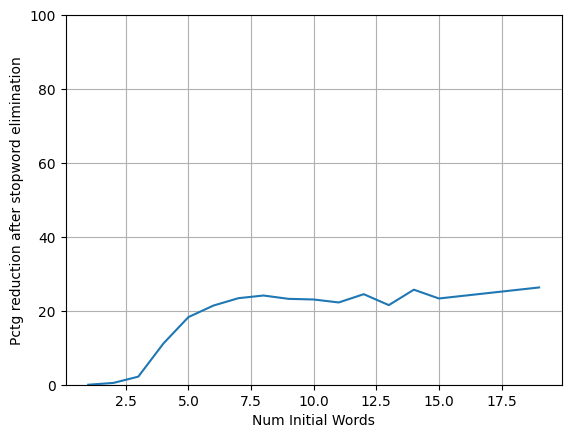

In [33]:
fig, ax = plt.subplots()
ax.plot(aux.set_index("NumWords").pctg_red)
ax.set(xlabel="Num Initial Words", ylabel="Pctg reduction after stopword elimination")
ax.set_ylim((0,100))
ax.grid()

In [37]:
elems = {}
for elem in df.Words:
    for word in elem:
        if word in elems:
            elems[word]+=1
        else:
            elems[word]=1

len(elems.keys())

6406

In [55]:
elems_df= pd.DataFrame.from_dict(elems, orient="index").sort_values(0, ascending=False)
elems_df[0].value_counts()/len(elems_df)
elems_df[0]

Salad              784
Chicken            666
Sauce              538
Grilled            444
Cake               360
                  ... 
Seviche              1
Maraschino           1
Unfried              1
No-Lettuce           1
Mustard-Roasted      1
Name: 0, Length: 6406, dtype: int64

In [18]:
import re
import itertools
import networkx as nx
import matplotlib.pyplot as plt

# Sample list of dish names
dish_names = df.Words.to_list()

def preprocess(text):
    # Lowercase and remove punctuation (except if you want to keep hyphens etc.)
    text = text.lower()
    text = re.sub(r'[^a-z0-9\s]', '', text)
    tokens = text.split()
    return tokens

def build_cooccurrence_graph(dish_names):
    G = nx.Graph()
    for dish in dish_names:
        dish = ' '.join(dish)
        words = preprocess(dish)
        # Add nodes for each word (if not already present)
        for word in words:
            if word not in G:
                G.add_node(word)
        # Consider every unordered pair of distinct words
        for word1, word2 in itertools.combinations(set(words), 2):
            if G.has_edge(word1, word2):
                G[word1][word2]['weight'] += 1
            else:
                G.add_edge(word1, word2, weight=1)
    return G
# Build and plot the co-occurrence graph
G_co = build_cooccurrence_graph(dish_names)

In [ ]:
def plot_graph(G):
    # Adjust spring_layout parameters: 
    # 'k' determines the optimal distance between nodes; higher values push nodes further apart.
    pos = nx.spring_layout(G, k=0.6, iterations=200, seed=42)
    edge_widths = [G[u][v]['weight'] for u, v in G.edges()]
    
    plt.figure(figsize=(100, 100))
    nx.draw_networkx_nodes(G, pos, node_color='lightblue', node_size=500)
    nx.draw_networkx_edges(G, pos, width=edge_widths, edge_color='gray')
    nx.draw_networkx_labels(G, pos, font_size=10)
    plt.title("Dish Name Co-occurrence Knowledge Graph")
    plt.axis('off')
    plt.show()

plot_graph(G_co)

In [19]:
import spacy
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import re

# Load spaCy small model for speed; you can use 'en_core_web_md' or 'en_core_web_lg' for better vectors.
nlp = spacy.load("en_core_web_sm")

def preprocess_spacy(text):
    # Use spaCy tokenizer and lower the text
    text = text.lower()
    # Remove punctuation using regex if needed
    text = re.sub(r'[^a-z0-9\s]', '', text)
    return text.split()

def build_semantic_graph(dish_names, similarity_threshold=0.5):
    G = nx.Graph()
    # Gather unique words from all dish names
    unique_words = set()
    for dish in dish_names:
        dish = ' '.join(dish)
        tokens = preprocess_spacy(dish)
        unique_words.update(tokens)
    
    # Pre-compute spaCy Doc vectors for each word (if using models with vectors)
    word2vec = {}
    for word in unique_words:
        # Create a spaCy token (the .vector attribute; note that the 'sm' model has limited vector info)
        doc = nlp(word)
        word2vec[word] = doc.vector
        # Add word as node with a label attribute (optional)
        G.add_node(word, label=word)
    
    # Compare each pair using cosine similarity
    words_list = list(unique_words)
    for i in range(len(words_list)):
        for j in range(i+1, len(words_list)):
            w1 = words_list[i]
            w2 = words_list[j]
            vec1 = word2vec[w1]
            vec2 = word2vec[w2]
            # Compute cosine similarity (avoid division by zero)
            if np.linalg.norm(vec1) != 0 and np.linalg.norm(vec2) != 0:
                similarity = np.dot(vec1, vec2) / (np.linalg.norm(vec1) * np.linalg.norm(vec2))
            else:
                similarity = 0
            if similarity >= similarity_threshold:
                # You can also weight the edge by similarity score
                G.add_edge(w1, w2, weight=similarity)
    return G

# Build and plot semantic graph
G_sem = build_semantic_graph(dish_names, similarity_threshold=0.6)


In [ ]:
#plot_graph_semantic(G_sem)

In [20]:
import networkx as nx

# Assuming G is your graph

# Degree Centrality
degree_centrality = nx.degree_centrality(G_co)
# Betweenness Centrality
betweenness_centrality = nx.betweenness_centrality(G_co)
# Closeness Centrality
closeness_centrality = nx.closeness_centrality(G_co)
# Eigenvector Centrality (ensure your graph is connected or use the appropriate version for each component)
try:
    eigenvector_centrality = nx.eigenvector_centrality(G_co, max_iter=1000)
except nx.NetworkXException:
    eigenvector_centrality = None

# Sort nodes by a centrality measure. For instance, using betweenness:
sorted_betweenness = sorted(betweenness_centrality.items(), key=lambda x: x[1], reverse=True)




In [21]:
print("Top 5 nodes by betweenness centrality:")
for node, centrality in sorted_betweenness[:100]:
    print(f"{node}: {centrality}")

Top 5 nodes by betweenness centrality:
sauce: 0.06645665222401821
chicken: 0.06595775346223165
salad: 0.05366008580106103
grilled: 0.03795050227827954
cake: 0.035783352336905126
cream: 0.03087114303610412
cheese: 0.027333783862507004
chocolate: 0.02674637894911291
pork: 0.026417345579720256
butter: 0.02607875462042789
roasted: 0.024319426910922592
soup: 0.023762244210898068
lemon: 0.021577984713208768
pie: 0.01879079785653642
rice: 0.017699127034269787
turkey: 0.01732474516275282
cookies: 0.015604178853366528
shrimp: 0.015106732395893318
potatoes: 0.01495218891275543
potato: 0.013464257400447053
sweet: 0.012814633978064923
tomato: 0.012804196465460332
salmon: 0.012296195113625768
green: 0.011824869711684526
red: 0.011442598417633008
spiced: 0.011187015453842595
bread: 0.011121451341298542
lamb: 0.010433601013268717
cocktail: 0.009981278933100128
corn: 0.009868962898907528
ginger: 0.009680567865317943
fresh: 0.009567047471656143
beef: 0.009468150806364456
orange: 0.009444148646565583
ic

In [22]:
import community.community_louvain as community_louvain # pip install python-louvain

# Compute the best partition
partition = community_louvain.best_partition(G_co)

# Group nodes by their assigned community
communities = {}
for node, comm in partition.items():
    communities.setdefault(comm, []).append(node)

print("Detected communities:")
for comm, nodes in communities.items():
    print(f"Community {comm}: {nodes}")


Detected communities:
Community 0: ['dried', 'cranberry', 'white', 'chocolate', 'biscotti', 'plum', 'whipped', 'cream', 'blackandwhite', 'pancake', 'cake', 'dulce', 'leche', 'ice', 'strawberries', 'mexican', 'mini', 'tea', 'chaispiced', 'cheesecake', 'ginger', 'crust', 'cakes', 'coconut', 'candy', 'drops', 'boozy', 'concordgrape', 'pops', 'chocolateespresso', 'lava', 'espresso', 'sugar', 'cookie', 'butter', 'glaze', 'hazelnut', 'parisbrest', 'whole', 'milk', 'toffee', 'squares', 'apricots', 'amaretto', 'syrup', 'albicocche', 'english', 'pumpkin', 'seed', 'brittle', 'lemonsouffle', 'pudding', 'bourbonvanilla', 'marshmallows', 'cane', 'pecan', 'pie', 'peach', 'pecans', 'pears', 'salted', 'caramel', 'ding', 'dong', 'granola', 'cluster', 'cookies', 'cherry', 'quince', 'calvados', 'crpe', 'blood', 'macaroons', 'spumoni', 'sundaes', 'hot', 'fudge', 'rhubarb', 'strawberry', 'compote', 'glazed', 'smores', 'sandwich', 'basic', 'crepes', 'pear', 'buckwheat', 'shortcakes', 'earlgrey', 'apricot', 

# Test Set

In [56]:
df_test = pd.read_csv("clean_mapping_test.csv")
df_preds = pd.read_csv("results_by_image.csv")

In [57]:
df_preds

,image_name,title,predicted_caption,bleu1,bleu2,rougeL,meteor
0,perfect-pan-roasted-chicken-thighs-365489.jpg,Perfect Pan-Roasted Chicken Thighs,Pork Chops with Caramelized Onions and Apples,0.000000,0.0,0.000000,0.000000
1,mushroom-and-fontina-quiche-355191.jpg,Mushroom and Fontina Quiche,Pork and Black Bean Chili,20.000000,0.0,22.222222,12.195122
2,grill-roasted-pineapple.jpg,Grill-Roasted Pineapple,Grilled Corn with Lime and Cilantro,0.000000,0.0,0.000000,0.000000
3,shellfish-boil-with-spicy-green-dipping-sauce-...,Shellfish Boil with Spicy Green Dipping Sauce,Grilled Corn and Tomatoes with Cilantro-Lime D...,14.285714,0.0,13.333333,7.142857
4,simple-strawberry-dulce-de-leche-shortbread-ta...,Simple Strawberry Dulce de Leche Shortbread Tart,Chocolate Mousse with Strawberries,0.000000,0.0,0.000000,7.462687
...,...,...,...,...,...,...,...
1342,roasted-beets-with-crispy-sunchokes-and-pickle...,Roasted Beets With Crispy Sunchokes and Pickle...,Grilled Corn and Tomato Salad with Chipotle Vi...,11.031211,0.0,10.526316,11.235955
1343,jalapeno-poppers-243195.jpg,Jalapeño Poppers,Grilled Chicken Skewers with Lemon and Herbs,0.000000,0.0,0.000000,0.000000
1344,baked-pears-with-ice-cream-350160.jpg,Baked Pears with Ice cream,Roasted Tomato Soup,0.000000,0.0,0.000000,0.000000
1345,salted-black-licorice-caramels.jpg,Salted Black Licorice Caramels,Chocolate-Dipped Strawberries,0.000000,0.0,0.000000,0.000000


In [58]:
df_test["NumWords"] = df.Title.apply(word_count)
df_test["NumWords_no_stopwords"] = df.Title.apply(word_count_capital)
df_test["stopwords"] = df.Title.apply(save_stopwords)
df_test["Words"] = df.Title.apply(save_words)

In [59]:
df_preds["NumWords"] = df_preds.predicted_caption.apply(word_count)
df_preds["NumWords_no_stopwords"] = df_preds.predicted_caption.apply(word_count_capital)
df_preds["stopwords"] = df_preds.predicted_caption.apply(save_stopwords)
df_preds["Words"] = df_preds.predicted_caption.apply(save_words)

In [60]:
count_test_stopwords={}
for lista in df_test["stopwords"]:
    for stopword in lista:
        if stopword in count_test_stopwords:
            count_test_stopwords[stopword]+=1
        else:
            count_test_stopwords[stopword]=1

In [61]:
count_pred_stopwords={}
for lista in df_preds["stopwords"]:
    for stopword in lista:
        if stopword in count_pred_stopwords:
            count_pred_stopwords[stopword]+=1
        else:
            count_pred_stopwords[stopword]=1

In [62]:
diff_dict = {}

for key, value in count_test_stopwords.items():
    if key in count_pred_stopwords:
        diff_dict[key] = count_test_stopwords[key] - count_pred_stopwords[key]
    else:
        diff_dict[key] = count_test_stopwords[key]

for key, value in count_pred_stopwords.items():
    if key not in count_pred_stopwords:
        diff_dict[key] = 0 - count_pred_stopwords[key]


In [71]:
(pd.DataFrame.from_dict(count_pred_stopwords, orient="index").sum()/pd.DataFrame.from_dict(count_test_stopwords, orient="index").sum())*100 - 100


0    68.945869
dtype: float64

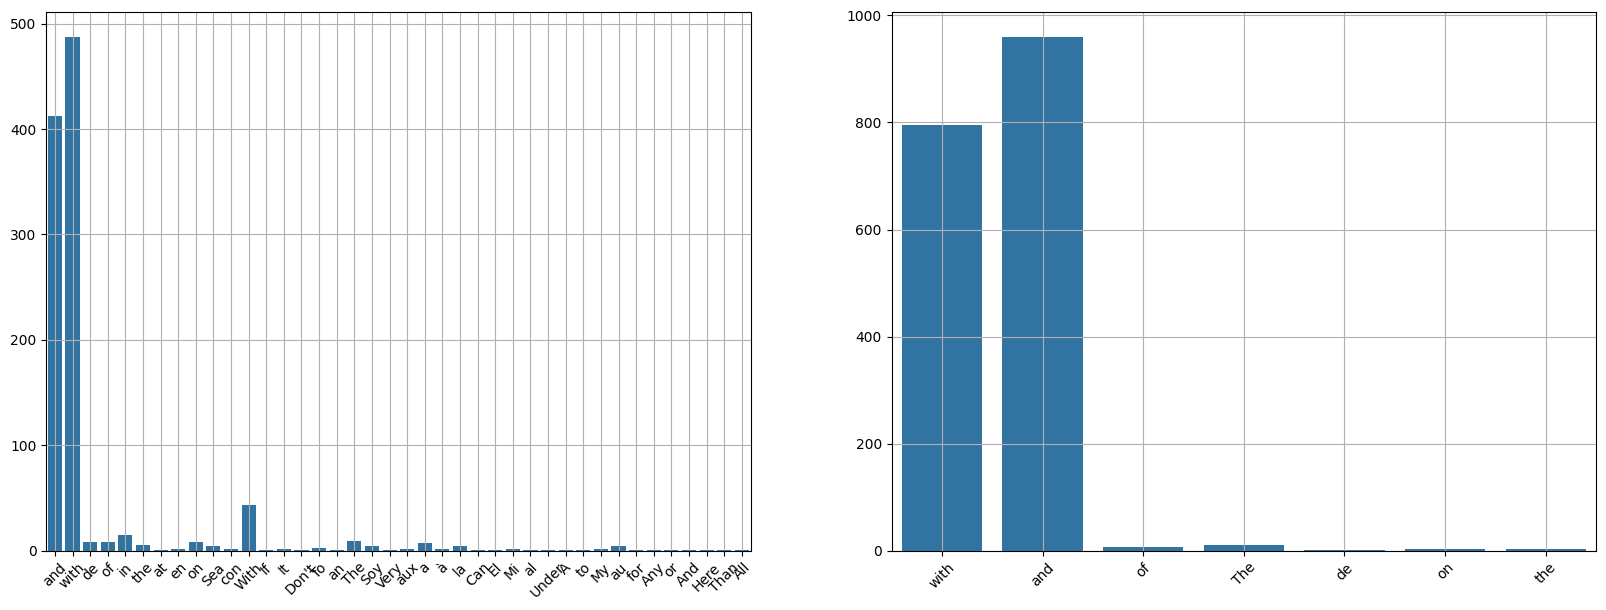

In [63]:
fig, axs = plt.subplots(1,2, figsize=(20,7))
sns.barplot(count_test_stopwords, ax=axs[0])
axs[0].tick_params(axis="x",rotation=45)
axs[0].grid()
sns.barplot(count_pred_stopwords, ax=axs[1])
axs[1].tick_params(axis="x",rotation=45)
axs[1].grid()

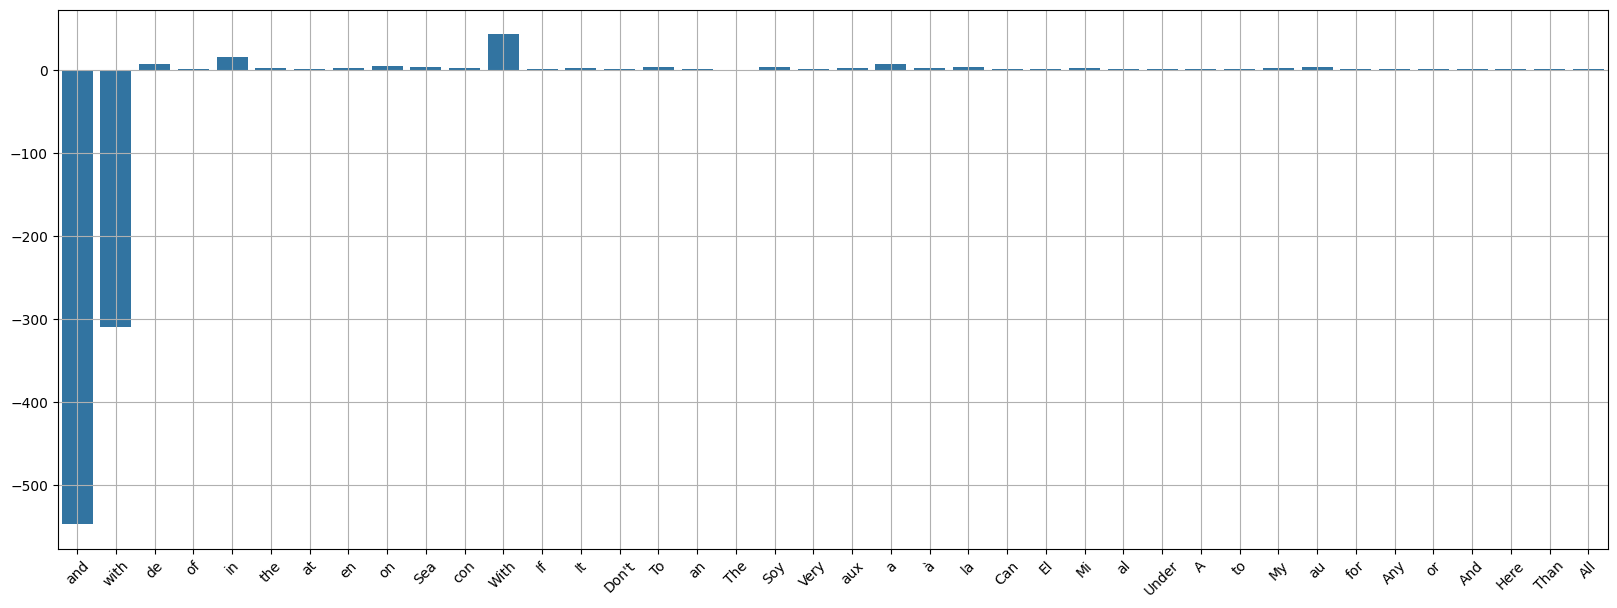

In [64]:
fig, ax = plt.subplots(figsize=(20,7))
sns.barplot(diff_dict, ax=ax)
ax.tick_params(axis="x",rotation=45)
ax.grid()

In [72]:
aux_count_wrds_test = df_test["NumWords"].value_counts().reset_index().sort_values("NumWords")
aux_count_wrds_preds = df_preds["NumWords"].value_counts().reset_index().sort_values("NumWords")
aux_count_wrds_no_stop_test = df_test["NumWords_no_stopwords"].value_counts().reset_index().sort_values("NumWords_no_stopwords")
aux_count_wrds_no_stop_preds = df_preds["NumWords_no_stopwords"].value_counts().reset_index().sort_values("NumWords_no_stopwords")

In [81]:
aux_count_wrds_test["NumWords"].sum()/aux_count_wrds_preds["NumWords"].sum()

1.6545454545454545

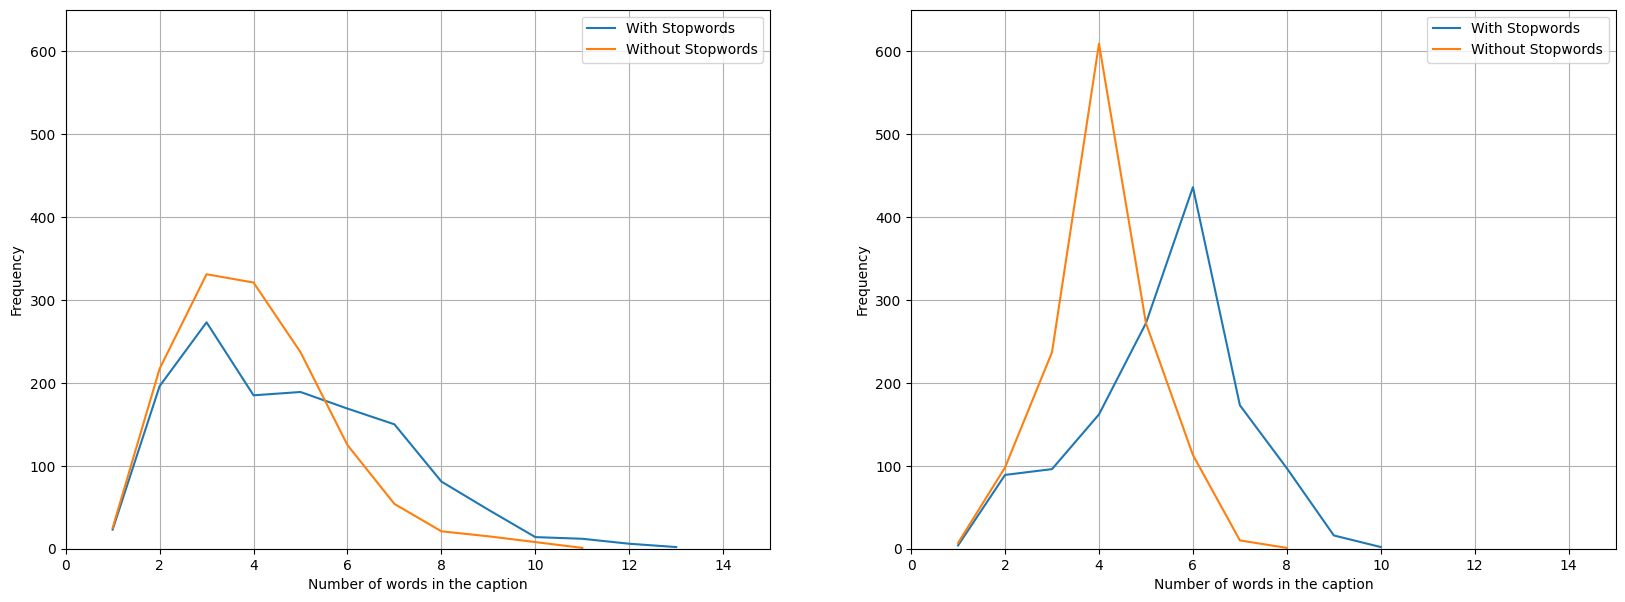

In [73]:
fig, ax = plt.subplots(1,2,figsize=(20,7))
ax[0].plot(aux_count_wrds_test.NumWords, aux_count_wrds_test["count"], label="With Stopwords")
ax[0].plot(aux_count_wrds_no_stop_test.NumWords_no_stopwords, aux_count_wrds_no_stop_test["count"], label="Without Stopwords")
ax[0].legend()
ax[0].set_xlim(0,15)
ax[0].set_ylim(0,650)
ax[0].set(xlabel="Number of words in the caption", ylabel="Frequency")
ax[0].grid()
ax[1].plot(aux_count_wrds_preds.NumWords, aux_count_wrds_preds["count"], label="With Stopwords")
ax[1].plot(aux_count_wrds_no_stop_preds.NumWords_no_stopwords, aux_count_wrds_no_stop_preds["count"], label="Without Stopwords")
ax[1].legend()
ax[1].set_xlim(0,15)
ax[1].set_ylim(0,650)
ax[1].set(xlabel="Number of words in the caption", ylabel="Frequency")
ax[1].grid()

In [74]:
aux_test = df_test[["NumWords", "NumWords_no_stopwords"]].groupby("NumWords").mean().reset_index()
aux_test["pctg_red"] = (100*(aux_test.NumWords - aux_test.NumWords_no_stopwords)/aux_test.NumWords)
aux_preds = df_preds[["NumWords", "NumWords_no_stopwords"]].groupby("NumWords").mean().reset_index()
aux_preds["pctg_red"] = (100*(aux_preds.NumWords - aux_preds.NumWords_no_stopwords)/aux_preds.NumWords)

In [77]:
aux_test["pctg_red"]

0      0.000000
1      0.510204
2      2.442002
3     10.135135
4     17.883598
5     21.696252
6     22.666667
7     24.537037
8     22.458629
9     21.428571
10    21.212121
11    26.388889
12    23.076923
Name: pctg_red, dtype: float64

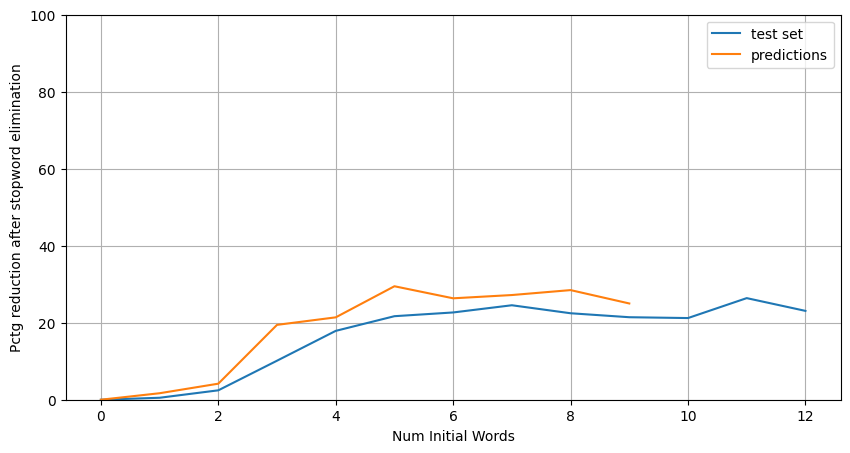

In [75]:
fig, ax = plt.subplots(figsize=(10,5))
ax.plot(aux_test.pctg_red, label="test set")
ax.plot(aux_preds.pctg_red, label="predictions")
ax.set(xlabel="Num Initial Words", ylabel="Pctg reduction after stopword elimination")
ax.set_ylim((0,100))
ax.legend()
ax.grid()

In [36]:
dish_names_test = df_test.Words.to_list()
G_sem_test = build_semantic_graph(dish_names_test, similarity_threshold=0.6)

In [37]:
dish_names_test

[['dried', 'cranberry', 'white', 'chocolate', 'biscotti'],
 ['braised', 'beef', 'short', 'ribs'],
 ['bruschetta',
  'rosemary',
  'roasted',
  'plum',
  'tomatoes',
  'ricotta',
  'prosciutto'],
 ['mustardcrusted', 'pork', 'farro', 'carrot', 'salad'],
 ['lemon', 'whipped', 'cream'],
 ['salmon', 'nioise'],
 ['blackandwhite', 'pancake', 'cake'],
 ['dulce',
  'leche',
  'ice',
  'cream',
  'fresh',
  'strawberries',
  'mexican',
  'chocolate',
  'sauce'],
 ['mini',
  'rack',
  'lamb',
  'nutty',
  'beluga',
  'lentils',
  'sauted',
  'garlic',
  'spinach'],
 ['mint', 'tea'],
 ['hanger', 'steak', 'charred', 'scallion', 'sauce'],
 ['chaispiced', 'cheesecake', 'ginger', 'crust'],
 ['braised', 'turkey', 'legs'],
 ['heavenandearth', 'tempura', 'cakes', 'ten', 'chi', 'kaki', 'ag'],
 ['swiss', 'chard', 'horseradish'],
 ['coconut', 'ginger', 'candy', 'drops'],
 ['basil', 'caesar', 'salad'],
 ['boozy', 'concordgrape', 'ice', 'pops'],
 ['cranapple', 'jellies'],
 ['lemony', 'asparagus'],
 ['chocolat

In [38]:
import networkx as nx

# Assuming G is your graph

# Degree Centrality
degree_centrality = nx.degree_centrality(G_sem_test)
# Betweenness Centrality
betweenness_centrality = nx.betweenness_centrality(G_sem_test)
# Closeness Centrality
closeness_centrality = nx.closeness_centrality(G_sem_test)
# Eigenvector Centrality (ensure your graph is connected or use the appropriate version for each component)
try:
    eigenvector_centrality = nx.eigenvector_centrality(G_sem_test, max_iter=1000)
except nx.NetworkXException:
    eigenvector_centrality = None

# Sort nodes by a centrality measure. For instance, using betweenness:
sorted_betweenness = sorted(betweenness_centrality.items(), key=lambda x: x[1], reverse=True)


In [39]:
print("Top 10 nodes by betweenness centrality:")
for node, centrality in sorted_betweenness[:10]:
    print(f"{node}: {centrality}")

Top 10 nodes by betweenness centrality:
popcorn: 0.016117494302365875
drunken: 0.013624481979786118
braid: 0.012946900407498078
orange: 0.011424736176660259
caramellayered: 0.011281875762386546
stormy: 0.011142925454432321
stoutsteamed: 0.008994850512586099
upsidedown: 0.00876692341641447
spiked: 0.008025503803247545
pineapple: 0.007268977251701113


In [40]:
import community.community_louvain as community_louvain # pip install python-louvain

# Compute the best partition
partition = community_louvain.best_partition(G_sem_test)

# Group nodes by their assigned community
communities = {}
for node, comm in partition.items():
    communities.setdefault(comm, []).append(node)

print("Detected communities:")
for comm, nodes in communities.items():
    print(f"Community {comm}: {nodes}")

Detected communities:
Community 0: ['crme', 'wedges', 'chunks', 'tostadas', 'balls', 'falafel', 'biscochitos', 'chestnuts', 'hills', 'fans', 'pepita', 'collars', 'apples', 'pops', 'rings', 'burrata', 'cupcakes', 'squares', 'spuds', 'stones', 'browns', 'tomatillos', 'frannys', 'borscht', 'toasts', 'fixings', 'souffl', 'gratins', 'cherries', 'eggs', 'legs', 'turnovers', 'breadcrumbs', 'oysters', 'pepitas', 'blackberries', 'onions', 'smores', 'crumbs', 'jubilee', 'hecks', 'popovers', 'fajitas', 'walnuts', 'brochettes', 'cutouts', 'triplecherries', 'bowls', 'hersheys', 'meatballs', 'paletas', 'pizzas', 'capers', 'strawberries', 'fries', 'hazelnuts', 'artichokes', 'comes', 'molasses', 'burgers', 'mills', 'grapes', 'dumplings', 'pho', 'buttons', 'cigars', 'cookies', 'larb', 'almonds', 'pickles', 'financiers', 'latkes', 'apricots', 'spinacharugula', 'stollenkonfekt', 'orzo', 'potpies', 'carrots', 'jellies', 'chips', 'stacks', 'jben', 'ramps', 'dads', 'ravioli', 'shanks', 'washboards', 'rubens

In [41]:
dish_names_preds = df_preds.Words.to_list()
G_sem_preds = build_semantic_graph(dish_names_preds, similarity_threshold=0.6)

In [42]:
import networkx as nx

# Assuming G is your graph

# Degree Centrality
degree_centrality = nx.degree_centrality(G_sem_preds)
# Betweenness Centrality
betweenness_centrality = nx.betweenness_centrality(G_sem_preds)
# Closeness Centrality
closeness_centrality = nx.closeness_centrality(G_sem_preds)
# Eigenvector Centrality (ensure your graph is connected or use the appropriate version for each component)
try:
    eigenvector_centrality = nx.eigenvector_centrality(G_sem_preds, max_iter=1000)
except nx.NetworkXException:
    eigenvector_centrality = None

# Sort nodes by a centrality measure. For instance, using betweenness:
sorted_betweenness = sorted(betweenness_centrality.items(), key=lambda x: x[1], reverse=True)


In [43]:
print("Top 10 nodes by betweenness centrality:")
for node, centrality in sorted_betweenness[:10]:
    print(f"{node}: {centrality}")

Top 10 nodes by betweenness centrality:
orange: 0.06665023800730817
pistachio: 0.04876630011261157
roasted: 0.03837128320868253
cheese: 0.033105191599448414
koolaid: 0.029116465783114828
parsnip: 0.028767053450136408
pita: 0.023148454505864228
upsidedown: 0.01773350994886666
orzo: 0.017086802112932488
blueberry: 0.01519474956716223


In [44]:
import community.community_louvain as community_louvain # pip install python-louvain

# Compute the best partition
partition = community_louvain.best_partition(G_sem_preds)

# Group nodes by their assigned community
communities = {}
for node, comm in partition.items():
    communities.setdefault(comm, []).append(node)

print("Detected communities:")
for comm, nodes in communities.items():
    print(f"Community {comm}: {nodes}")

Detected communities:
Community 0: ['cobbler', 'leg', 'basil', 'goat', 'vinaigrette', 'mojito', 'spice', 'peanutbutter', 'chocolatecaramel', 'mocha', 'cilantrolime', 'bacon', 'shoulder', 'pot', 'coconut', 'peach', 'caramel', 'carbonara', 'pretzel', 'margarita', 'mint', 'ginger', 'pine', 'arugula', 'sushi', 'roast', 'potato', 'butter', 'dijon', 'ribeye', 'parsley', 'tea', 'curry', 'walnut', 'rice', 'almond', 'chicken', 'crispy', 'cookie', 'frittata', 'butternut', 'granola', 'mayo', 'spritz', 'yogurt', 'mango', 'chile', 'jam', 'ham', 'champagne', 'pico', 'mozzarella', 'cilantro', 'galette', 'lamb', 'radicchio', 'bourbon', 'crostini', 'salmon', 'chocolatepecan', 'pepper', 'belly', 'banana', 'carrot', 'penne', 'cake', 'kale', 'chorizo', 'tuna', 'sorbet', 'pecan', 'latte', 'daiquiri', 'stirfry', 'tenderloin', 'rosewater', 'pisco', 'garlic', 'pita', 'chili', 'chocolatepeanut', 'mediterranean', 'cob', 'tacos', 'manhattan', 'spinach', 'quiche', 'julep', 'ganache', 'cinnamon', 'collard', 'cucum

## Differences between graphs

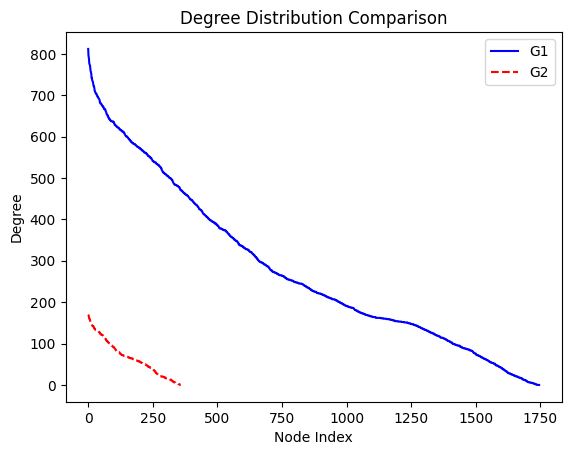

In [45]:
import matplotlib.pyplot as plt

# Assuming G1 and G2 are your graphs
degree_sequence_G1 = sorted([d for n, d in G_sem_test.degree()], reverse=True)
degree_sequence_G2 = sorted([d for n, d in G_sem_preds.degree()], reverse=True)

plt.plot(degree_sequence_G1, 'b-', label='G1')
plt.plot(degree_sequence_G2, 'r--', label='G2')
plt.xlabel('Node Index')
plt.ylabel('Degree')
plt.title('Degree Distribution Comparison')
plt.legend()
plt.show()


In [46]:
import networkx as nx
import matplotlib.pyplot as plt

def plot_graph_semantic(G):
    pos = nx.spring_layout(G, seed=42)
    edge_weights = [G[u][v]['weight']*5 for u, v in G.edges()]  # multiplied for visualization scaling
    
    plt.figure(figsize=(100, 100))
    nx.draw_networkx_nodes(G, pos, node_color='lightgreen', node_size=500)
    nx.draw_networkx_edges(G, pos, width=edge_weights, edge_color='orange')
    nx.draw_networkx_labels(G, pos, font_size=10)
    plt.title("Dish Name Semantic Knowledge Graph")
    plt.axis('off')
    plt.show()


In [47]:
plot_graph_semantic(G_sem_test)

In [48]:
plot_graph_semantic(G_sem_preds)

In [49]:
print("\t\t==============")
print("Test semantic graph number of nodes:", G_sem_test.number_of_nodes())
print("Preds semantic graph number of nodes:", G_sem_preds.number_of_nodes())
print("\t\t==============")
print("Test semantic graph number of edges:", G_sem_test.number_of_edges())
print("Preds semantic graph number of edges:", G_sem_preds.number_of_edges())
print("\t\t==============")
print("Test Nodes to Edge Ratio", G_sem_test.number_of_nodes()/G_sem_test.number_of_edges())
print("Preds Nodes to Edge Ratio", G_sem_preds.number_of_nodes()/G_sem_preds.number_of_edges())

Test semantic graph number of nodes: 1746
Preds semantic graph number of nodes: 359
Test semantic graph number of edges: 243715
Preds semantic graph number of edges: 11698
Test Nodes to Edge Ratio 0.007164105615165254
Preds Nodes to Edge Ratio 0.030689006667806464


In [50]:
from sentence_transformers import SentenceTransformer
import numpy as np
model = SentenceTransformer('all-MiniLM-L6-v2')

c:\Users\Biel GG\AppData\Local\Programs\Python\Python311\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [51]:
df_test["Full_Sentences"] = [' '.join(x) for x in df_test['Words']]
df_preds["Full_Sentences"] = [' '.join(x) for x in df_preds['Words']]

In [52]:
full_sentences_test = df_test.Full_Sentences.to_list()
full_sentences_preds = df_preds.Full_Sentences.to_list()

In [53]:
embeddings_test = model.encode(full_sentences_test)
embeddings_preds = model.encode(full_sentences_preds)

In [54]:
import hdbscan
import numpy as np
from sklearn.metrics import adjusted_rand_score, normalized_mutual_info_score
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

def evaluate_hdbscan_vs_predictions(X_test_embeds, model_predictions, min_cluster_size=5):
    """
    Cluster the test embeddings using HDBSCAN, then compare the clusters to the provided model predictions.
    
    Parameters:
      - X_test_embeds: 2D numpy array, shape (n_samples, n_features), your test set embeddings.
      - model_predictions: 1D numpy array, shape (n_samples,), predicted class labels from your model.
      - min_cluster_size: Minimum size of clusters to be considered by HDBSCAN.
    
    Returns:
      Prints the Adjusted Rand Index (ARI) and Normalized Mutual Information (NMI).
      Also produces a 2D PCA visualization of the clustering.
    """
    
    # Run HDBSCAN using Euclidean distance (you can change metric if needed)
    clusterer = hdbscan.HDBSCAN(min_cluster_size=min_cluster_size, metric='euclidean')
    cluster_labels = clusterer.fit_predict(X_test_embeds)
    
    # HDBSCAN marks noise points with -1; you can choose to filter these out for a fair comparison
    valid_mask = cluster_labels != -1
    if np.sum(valid_mask) == 0:
        print("No clusters found by HDBSCAN (all points marked as noise).")
        return
    
    filtered_preds = model_predictions[valid_mask]
    filtered_clusters = cluster_labels[valid_mask]
    
    # Compute comparison metrics
    ari = adjusted_rand_score(filtered_preds, filtered_clusters)
    nmi = normalized_mutual_info_score(filtered_preds, filtered_clusters)
    
    print(f"Adjusted Rand Index (ARI): {ari:.3f}")
    print(f"Normalized Mutual Information (NMI): {nmi:.3f}")
    
    # Visualize clusters using PCA for dimensionality reduction
    pca = PCA(n_components=2)
    X_reduced = pca.fit_transform(X_test_embeds)
    
    plt.figure(figsize=(10, 8))
    scatter = plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=cluster_labels, cmap='viridis', s=50, alpha=0.7)
    plt.title("HDBSCAN Clustering on Test Embeddings (PCA-reduced)")
    plt.xlabel("PCA Component 1")
    plt.ylabel("PCA Component 2")
    plt.colorbar(scatter, label="HDBSCAN Cluster Label")
    plt.show()

Adjusted Rand Index (ARI): 0.001
Normalized Mutual Information (NMI): 0.170


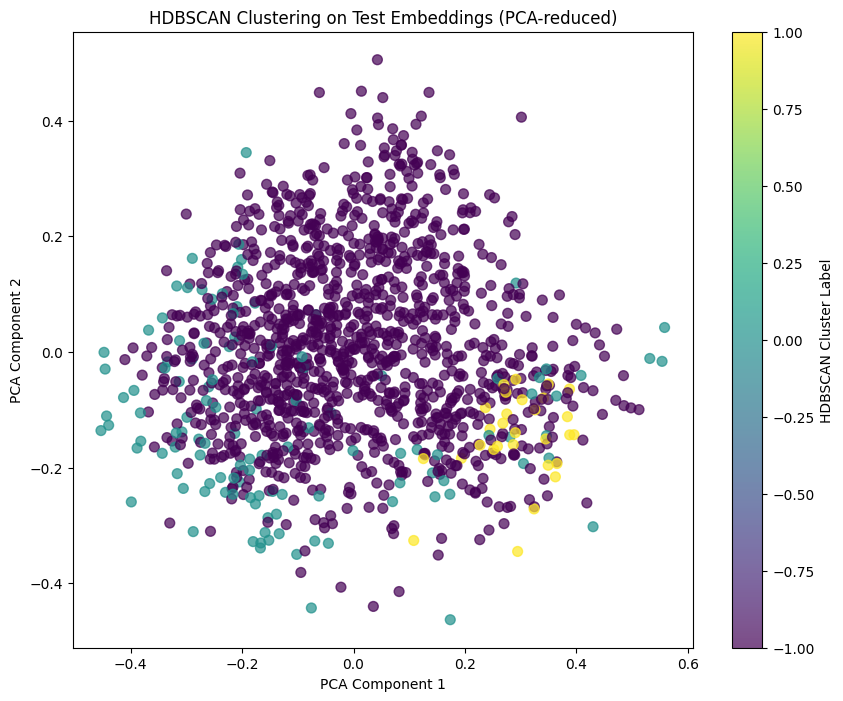

In [55]:
# === Example Usage ===
# (Replace the following dummy data with your actual embeddings and predictions)
np.random.seed(42)
evaluate_hdbscan_vs_predictions(embeddings_test, np.array(full_sentences_preds), min_cluster_size=5)

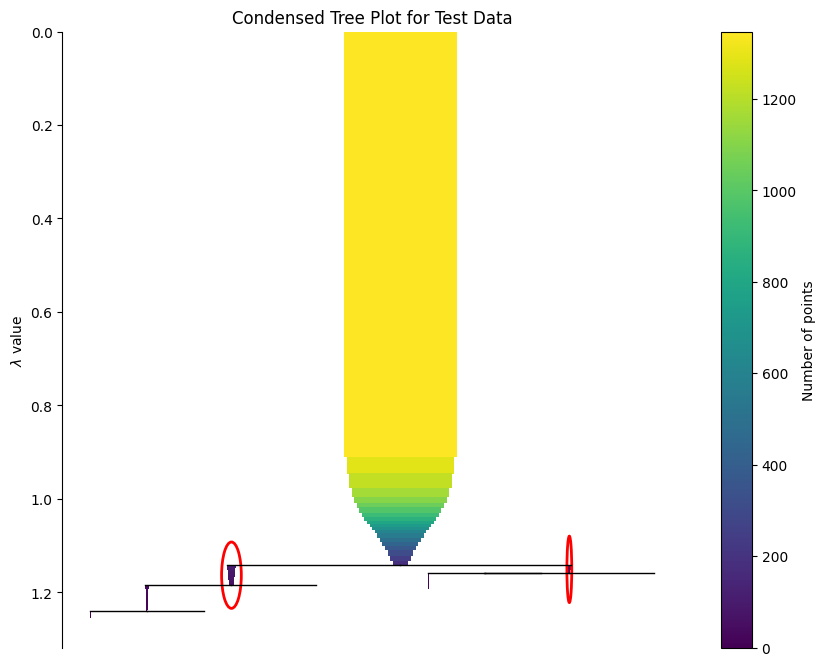

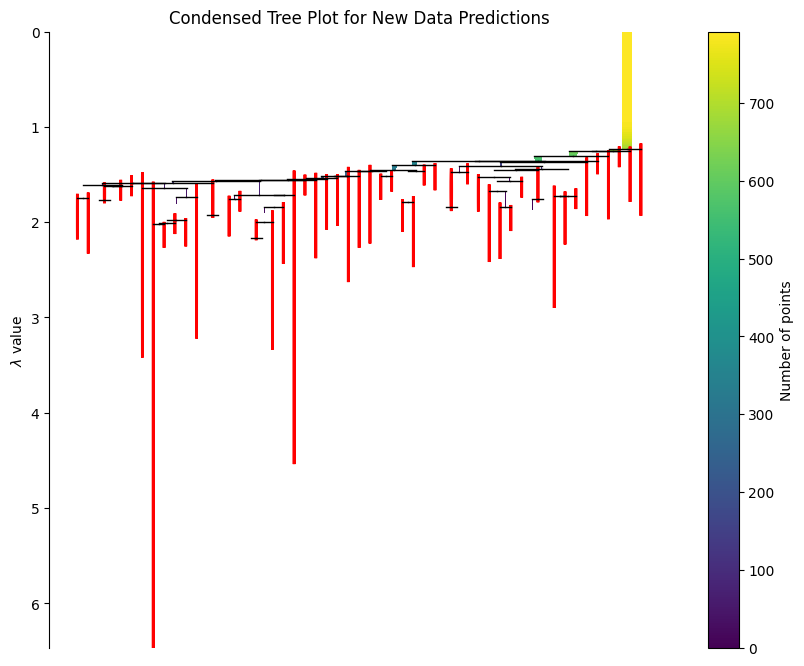

HDBSCAN(min_cluster_size=3)

In [56]:
import hdbscan
import numpy as np
import matplotlib.pyplot as plt

def plot_condensed_tree(X, title, min_cluster_size=5, metric='euclidean'):
    """
    Fit HDBSCAN to a dataset X and plot the condensed tree.
    
    Parameters:
      - X: 2D numpy array of embeddings (shape: [n_samples, n_features])
      - title: Title of the plot (string)
      - min_cluster_size: Minimum cluster size for HDBSCAN.
      - metric: Distance metric to use (default: 'euclidean').
      
    This function fits HDBSCAN to the input data, then uses the
    built-in condensed tree visualization to show the hierarchical
    clustering structure.
    """
    # Initialize and fit HDBSCAN
    clusterer = hdbscan.HDBSCAN(min_cluster_size=min_cluster_size, metric=metric)
    clusterer.fit(X)
    
    # Create a new figure for the condensed tree plot
    plt.figure(figsize=(10, 8))
    # Plot the condensed tree; select_clusters highlights stable clusters.
    clusterer.condensed_tree_.plot(select_clusters=True)
    plt.title(title)
    plt.show()
    
    return clusterer

# === Example Usage ===
# Assume you have three sets of embeddings: X_original, X_test, and X_new.
# For illustration, we'll create dummy data; replace these with your actual embeddings.

np.random.seed(42)

# Plot condensed tree for Test Data
plot_condensed_tree(embeddings_test, "Condensed Tree Plot for Test Data", min_cluster_size=5)

# Plot condensed tree for New Data Predictions
plot_condensed_tree(np.unique(embeddings_preds, axis=0), "Condensed Tree Plot for New Data Predictions", min_cluster_size=3)


In [57]:
import re
def word_normalizer(word): 
    word = re.sub('[^A-Za-z0-9]+', '', word)
    return word.lower()

In [58]:
unique_words_test = list(df_test.Words.apply(pd.Series).stack().unique())
unique_words_preds = list(df_preds.Words.apply(pd.Series).stack().unique())

In [59]:
unique_words_test = [word_normalizer(word) for word in unique_words_test]
unique_words_preds = [word_normalizer(word) for word in unique_words_preds]

In [60]:
intersection_test_preds = set(unique_words_test).intersection(set(unique_words_preds))

In [61]:
print("Proporcio del test a la intersecció test i pred:", 100*len(intersection_test_preds)/len(set(unique_words_test)))
print("Proporcio de les preds a la intersecció test i pred:", 100*len(intersection_test_preds)/len(set(unique_words_preds)))

Proporcio del test a la intersecció test i pred: 18.603319977103606
Proporcio de les preds a la intersecció test i pred: 90.5292479108635


In [62]:
count_words_test={}
for lista in df_test["Words"]:
    for word in lista:
        if word in count_words_test:
            count_words_test[word]+=1
        else:
            count_words_test[word]=1

In [63]:
count_words_preds={}
for lista in df_preds["Words"]:
    for word in lista:
        if word in count_words_preds:
            count_words_preds[word]+=1
        else:
            count_words_preds[word]=1

In [64]:
filtered_words_test = {}
for intersect_word in intersection_test_preds:
    if intersect_word in count_words_test.keys():
        filtered_words_test[intersect_word]=count_words_test[intersect_word]

In [65]:
pd.DataFrame.from_dict(filtered_words_test, orient="index").sort_values(0, ascending=False)

,0
salad,104
chicken,91
grilled,68
sauce,67
roasted,53
...,...
buttercream,1
coriander,1
fashioned,1
tamales,1


In [66]:
pd.DataFrame.from_dict(count_words_test, orient="index").sort_values(0, ascending=False)

,0
salad,104
chicken,91
grilled,68
sauce,67
roasted,53
...,...
chickencoconut,1
hair,1
peppery,1
seedsalt,1


In [69]:
count_words_test["lemon"]

44

In [67]:
filtered_words_preds= {}
for intersect_word in intersection_test_preds:
    if intersect_word in count_words_preds.keys():
        filtered_words_preds[intersect_word]=count_words_preds[intersect_word]

In [68]:
pd.DataFrame.from_dict(filtered_words_preds, orient="index").sort_values(0, ascending=False)

,0
grilled,341
lemon,196
roasted,183
chicken,162
pasta,134
...,...
cutlets,1
ham,1
walnuts,1
tuna,1


# Data of SD XL 150%

In [ ]:
df_wiwi["NumWords"] = df_wiwi.title.apply(word_count)
df_wiwi["NumWords_no_stopwords"] = df_wiwi.title.apply(word_count_capital)
df_wiwi["stopwords"] = df_wiwi.title.apply(save_stopwords)
df_wiwi["Words"] = df_wiwi.title.apply(save_words)
df_wiwi["NumWords_p"] = df_wiwi.predicted_caption.apply(word_count)
df_wiwi["NumWords_no_stopwords_p"] = df_wiwi.predicted_caption.apply(word_count_capital)
df_wiwi["stopwords_p"] = df_wiwi.predicted_caption.apply(save_stopwords)
df_wiwi["Words_p"] = df_wiwi.predicted_caption.apply(save_words)

In [9]:
count_test_stopwords={}
for lista in df_wiwi["stopwords"]:
    for stopword in lista:
        if stopword in count_test_stopwords:
            count_test_stopwords[stopword]+=1
        else:
            count_test_stopwords[stopword]=1

In [10]:
count_pred_stopwords={}
for lista in df_wiwi["stopwords_p"]:
    for stopword in lista:
        if stopword in count_pred_stopwords:
            count_pred_stopwords[stopword]+=1
        else:
            count_pred_stopwords[stopword]=1

In [11]:
diff_dict = {}

for key, value in count_test_stopwords.items():
    if key in count_pred_stopwords:
        diff_dict[key] = count_test_stopwords[key] - count_pred_stopwords[key]
    else:
        diff_dict[key] = count_test_stopwords[key]

for key, value in count_pred_stopwords.items():
    if key not in count_pred_stopwords:
        diff_dict[key] = 0 - count_pred_stopwords[key]


In [14]:
(pd.DataFrame.from_dict(count_test_stopwords, orient="index").sum()/pd.DataFrame.from_dict(count_pred_stopwords, orient="index").sum())*100


0    280.978261
dtype: float64

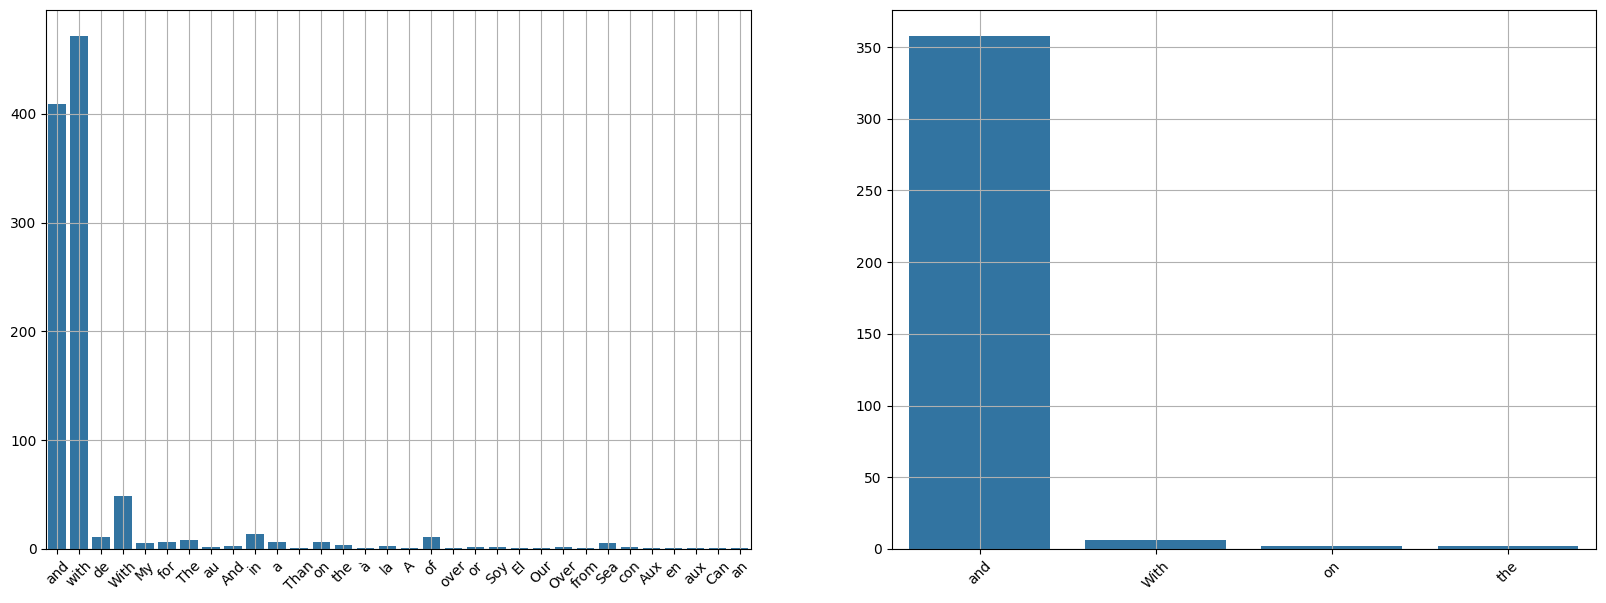

In [15]:
fig, axs = plt.subplots(1,2, figsize=(20,7))
sns.barplot(count_test_stopwords, ax=axs[0])
axs[0].tick_params(axis="x",rotation=45)
axs[0].grid()
sns.barplot(count_pred_stopwords, ax=axs[1])
axs[1].tick_params(axis="x",rotation=45)
axs[1].grid()

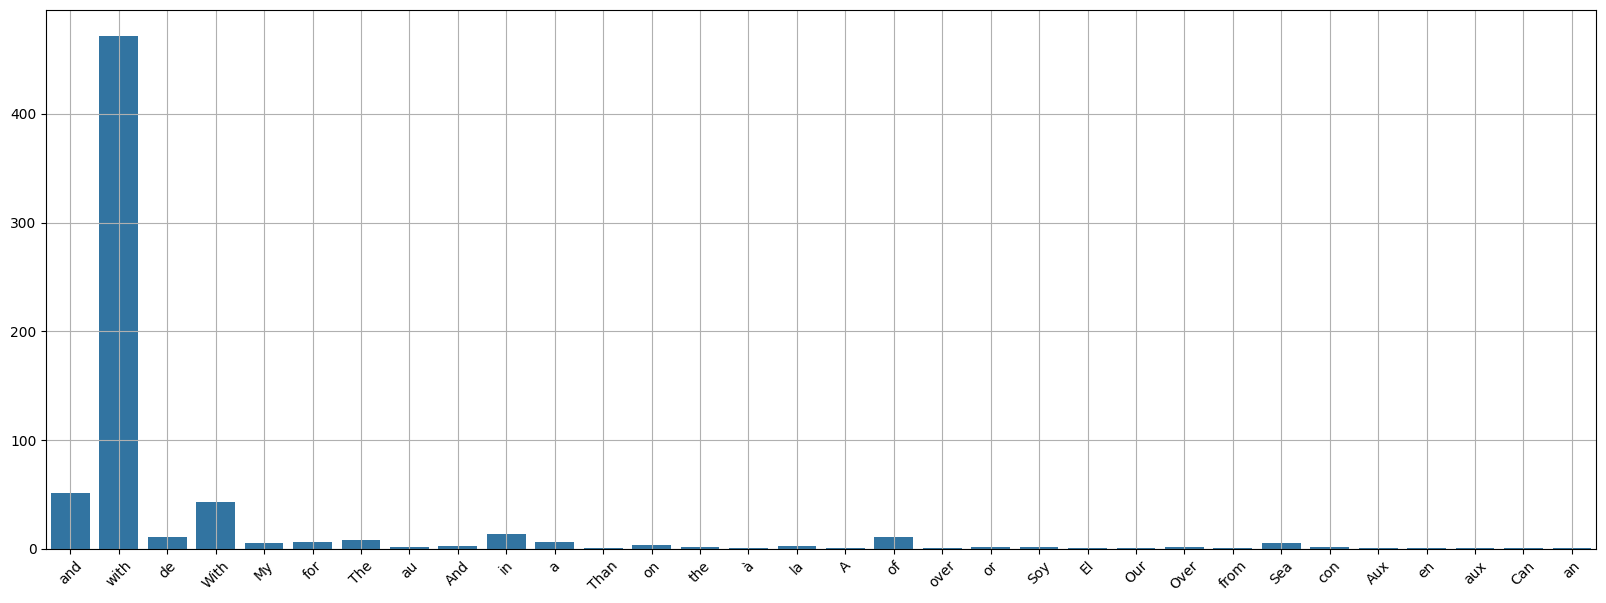

In [16]:
fig, ax = plt.subplots(figsize=(20,7))
sns.barplot(diff_dict, ax=ax)
ax.tick_params(axis="x",rotation=45)
ax.grid()

In [17]:
aux_count_wrds_test = df_wiwi["NumWords"].value_counts().reset_index().sort_values("NumWords")
aux_count_wrds_preds = df_wiwi["NumWords_p"].value_counts().reset_index().sort_values("NumWords_p")
aux_count_wrds_no_stop_test = df_wiwi["NumWords_no_stopwords"].value_counts().reset_index().sort_values("NumWords_no_stopwords")
aux_count_wrds_no_stop_preds = df_wiwi["NumWords_no_stopwords_p"].value_counts().reset_index().sort_values("NumWords_no_stopwords_p")

In [18]:
aux_count_wrds_test["NumWords"].sum()/aux_count_wrds_preds["NumWords_p"].sum()

1.0714285714285714

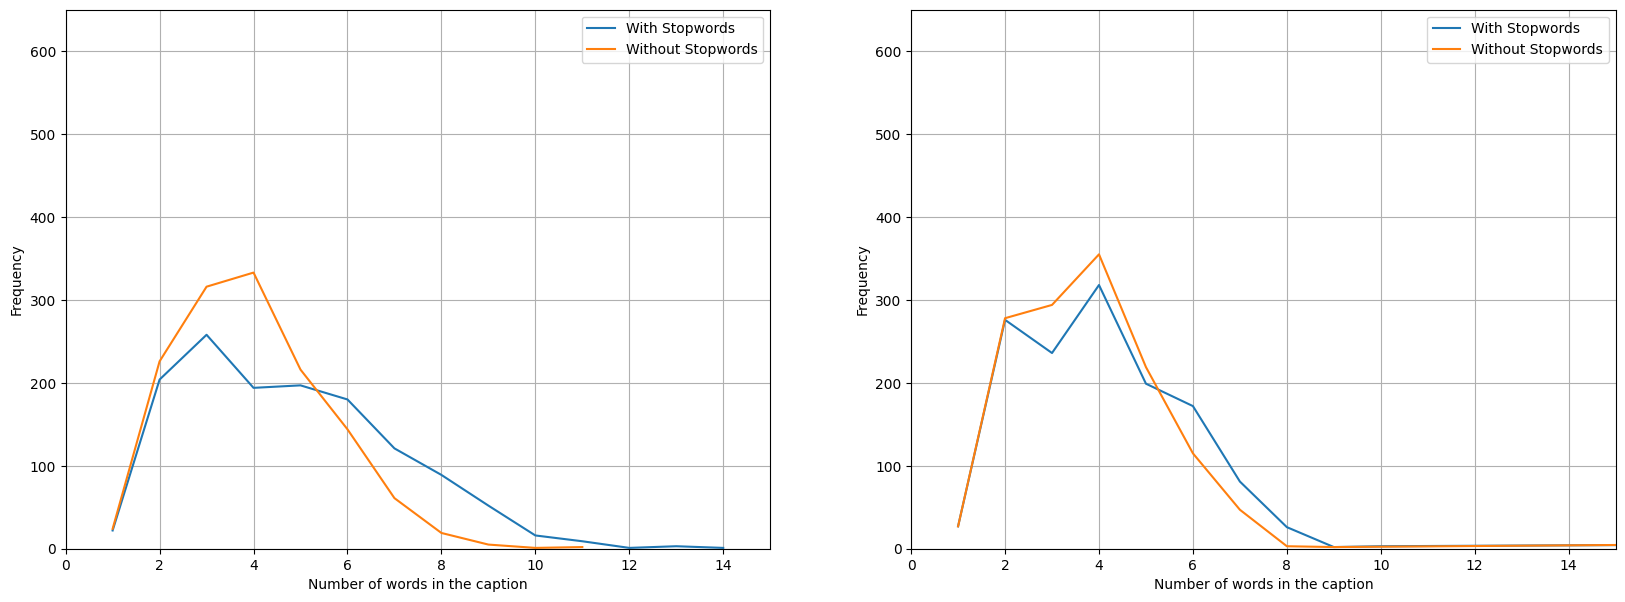

In [20]:
fig, ax = plt.subplots(1,2,figsize=(20,7))
ax[0].plot(aux_count_wrds_test.NumWords, aux_count_wrds_test["count"], label="With Stopwords")
ax[0].plot(aux_count_wrds_no_stop_test.NumWords_no_stopwords, aux_count_wrds_no_stop_test["count"], label="Without Stopwords")
ax[0].legend()
ax[0].set_xlim(0,15)
ax[0].set_ylim(0,650)
ax[0].set(xlabel="Number of words in the caption", ylabel="Frequency")
ax[0].grid()
ax[1].plot(aux_count_wrds_preds.NumWords_p, aux_count_wrds_preds["count"], label="With Stopwords")
ax[1].plot(aux_count_wrds_no_stop_preds.NumWords_no_stopwords_p, aux_count_wrds_no_stop_preds["count"], label="Without Stopwords")
ax[1].legend()
ax[1].set_xlim(0,15)
ax[1].set_ylim(0,650)
ax[1].set(xlabel="Number of words in the caption", ylabel="Frequency")
ax[1].grid()

In [21]:
aux_test = df_wiwi[["NumWords", "NumWords_no_stopwords"]].groupby("NumWords").mean().reset_index()
aux_test["pctg_red"] = (100*(aux_test.NumWords - aux_test.NumWords_no_stopwords)/aux_test.NumWords)
aux_preds = df_wiwi[["NumWords_p", "NumWords_no_stopwords_p"]].groupby("NumWords_p").mean().reset_index()
aux_preds["pctg_red"] = (100*(aux_preds.NumWords_p - aux_preds.NumWords_no_stopwords_p)/aux_preds.NumWords_p)

In [22]:
aux_test["pctg_red"]

0      0.000000
1      0.490196
2      2.842377
3     10.051546
4     17.664975
5     20.925926
6     21.605667
7     23.455056
8     24.145299
9     22.500000
10    23.232323
11    33.333333
12    20.512821
13    28.571429
Name: pctg_red, dtype: float64

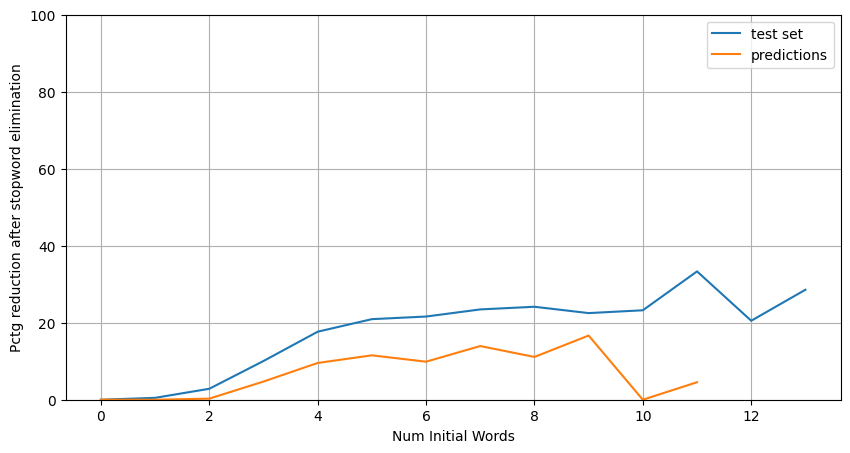

In [23]:
fig, ax = plt.subplots(figsize=(10,5))
ax.plot(aux_test.pctg_red, label="test set")
ax.plot(aux_preds.pctg_red, label="predictions")
ax.set(xlabel="Num Initial Words", ylabel="Pctg reduction after stopword elimination")
ax.set_ylim((0,100))
ax.legend()
ax.grid()

In [29]:
count_test_words={}
for lista in df_wiwi["Words"]:
    for stopword in lista:
        if stopword in count_test_words:
            count_test_words[stopword]+=1
        else:
            count_test_words[stopword]=1

In [30]:
count_pred_words={}
for lista in df_wiwi["Words_p"]:
    for stopword in lista:
        if stopword in count_pred_words:
            count_pred_words[stopword]+=1
        else:
            count_pred_words[stopword]=1

In [34]:
pd.DataFrame.from_dict(count_pred_words, orient="index").sort_values(0, ascending=False)

,0
<unk>,2526
Grilled,144
Salad,96
Chicken,96
Sauce,71
...,...
Burger,1
Crisps,1
Pancakes,1
Syrup,1


In [35]:
pd.DataFrame.from_dict(count_test_words, orient="index").sort_values(0, ascending=False)

,0
Chicken,76
Salad,75
Sauce,68
Grilled,67
Chocolate,50
...,...
Brown-Sugar,1
Brain,1
Flap,1
Sirloin,1
